In [ ]:
from tensorflow import keras

In [ ]:
# load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## **Basic analysis of Data**

In [ ]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
X_train, X_valid = X_train[5000:] / 255.0, X_train[:5000] / 255.0
y_train, y_valid = y_train[5000:], y_train[:5000]

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

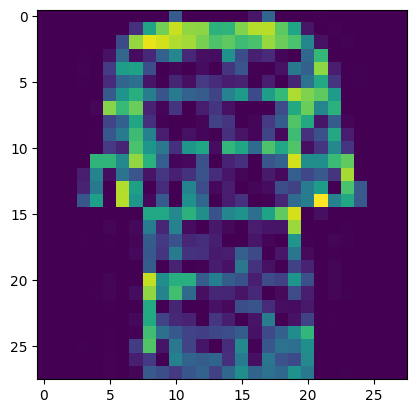

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[10])

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[10]]

'T-shirt/top'

## **Time to build model using `keras`**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# alternate way to make the above model
model2 = Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.layers

In [ ]:
model2.layers[1].name

'dense_3'

In [ ]:
weights, biases = model2.layers[1].get_weights()

In [ ]:
weights.shape, biases.shape


((784, 300), (300,))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 19s 10ms/step - loss: 0.7227 - accuracy: 0.7643 - val_loss: 0.5159 - val_accuracy: 0.8300
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4887 - accuracy: 0.8295 - val_loss: 0.4464 - val_accuracy: 0.8524
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4429 - accuracy: 0.8435 - val_loss: 0.4355 - val_accuracy: 0.8530
Epoch 4/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4143 - accuracy: 0.8543 - val_loss: 0.3979 - val_accuracy: 0.8672
Epoch 5/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3937 - accuracy: 0.8616 - val_loss: 0.3986 - val_accuracy: 0.8628
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3778 - accuracy: 0.8666 - val_loss: 0.3775 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3648 - accuracy: 0.8712 - val_loss: 0.3589 - val_

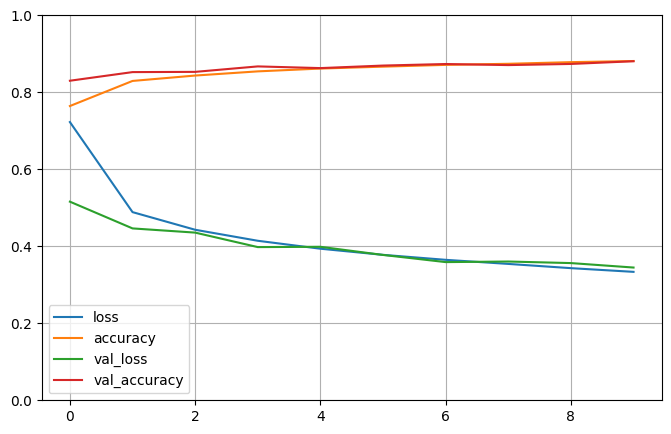

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
y_pred_loss, y_pred_accuracy = model.evaluate(X_test, y_test)
print(f"The loss on test dataset is: {y_pred_loss}")
print(f"The accuracy on test dataset is: {y_pred_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 60.8652 - accuracy: 0.8422
The loss on test dataset is: 60.86519241333008
The accuracy on test dataset is: 0.842199981212616


In [ ]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## **Time to check results of model**

In [ ]:
import numpy as np
indices = [np.argmax(subarr) for subarr in y_pred]

In [ ]:
np.array(class_names)[indices]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [ ]:
np.array(class_names)[y_test[:5]]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')